In [1]:
#Imported Libraries
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

In [2]:
#Imported Dataset
df_meta=pd.read_csv('movies_metadata.csv')
cols_meta=df_meta.columns
df_rating=pd.read_csv('ratings_small.csv')
cols_rating=df_rating.columns

In [3]:
#Metadata and Rating Columns heading
print(cols_meta)
print(cols_rating)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [4]:
#Head rows of Metadata
df_meta.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
#Head rows of Rating
df_rating.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [6]:
#Shape of Metadata and Rating dataset
print(df_meta.shape)
print(df_rating.shape)

(45466, 24)
(100004, 4)


In [7]:
#Filtering features with more than 50% Null values
print("Features With Null Value > 50%:")
print(df_meta.isna().mean()> 0.50)

Features With Null Value > 50%:
adult                    False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
id                       False
imdb_id                  False
original_language        False
original_title           False
overview                 False
popularity               False
poster_path              False
production_companies     False
production_countries     False
release_date             False
revenue                  False
runtime                  False
spoken_languages         False
status                   False
tagline                   True
title                    False
video                    False
vote_average             False
vote_count               False
dtype: bool


In [8]:
#Unnecessay Object features are selected
df_meta['id'] = df_meta['id'].astype('string') 
df_rating['movieId'] = df_rating['movieId'].astype('string')
objects = ['object']
object_col = df_meta.select_dtypes(include=object).columns.tolist()
print('Selected unnecessary features to drop:\n',object_col) 

Selected unnecessary features to drop:
 ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video']


In [9]:
#Unnecessary Object feature and filtered features are dropped
df_meta.drop(['adult', 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'original_title', 'overview', 
              'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 
              'status', 'tagline', 'title', 'video'], axis=1, inplace=True)
df_rating.drop(['userId', 'timestamp'], axis=1, inplace=True)

In [10]:
#Numeric features are selected
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','string','object']
cols_numeric_meta = df_meta.select_dtypes(include=numerics).columns.tolist()
cols_numeric_rating = df_rating.select_dtypes(include=numerics).columns.tolist()
cols_numeric_values = cols_numeric_meta + cols_numeric_rating
print('Selected numerical columns:\n',cols_numeric_values)    

Selected numerical columns:
 ['budget', 'id', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'movieId', 'rating']


In [11]:
#Merge Movie metadata and Rating dataset
df = pd.merge(df_meta,df_rating,how='inner',left_on='id',right_on='movieId')
cols=df.columns
print(df.shape)
print(cols)
df.head()

(44994, 10)
Index(['budget', 'id', 'original_language', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'movieId', 'rating'],
      dtype='object')


,budget,id,original_language,popularity,revenue,runtime,vote_average,vote_count,movieId,rating
0,60000000,949,en,17.924927,187436818.0,170.0,7.7,1886.0,949,3.5
1,60000000,949,en,17.924927,187436818.0,170.0,7.7,1886.0,949,4.0
2,60000000,949,en,17.924927,187436818.0,170.0,7.7,1886.0,949,2.0
3,60000000,949,en,17.924927,187436818.0,170.0,7.7,1886.0,949,5.0
4,60000000,949,en,17.924927,187436818.0,170.0,7.7,1886.0,949,3.0


In [12]:
#Unnecessary features dropped
df.drop(['id', 'movieId'], axis=1, inplace=True)

In [13]:
#Count of budget for original language
df.groupby(['original_language'])['budget'].count().sort_values(ascending=False).reset_index()

,original_language,budget
0,en,33281
1,fr,3406
2,de,3014
3,ja,929
4,es,894
5,it,562
6,ru,530
7,hi,360
8,sv,246
9,da,239


In [14]:
#Sum of buget for original language
df.groupby(['original_language'])['revenue'].sum().sort_values(ascending=False).reset_index()

,original_language,revenue
0,en,3.370461e+12
1,fr,1.994669e+10
2,es,8.437147e+09
3,it,6.961841e+09
4,zh,5.272104e+09
5,de,3.996483e+09
6,ja,2.945693e+09
7,sv,2.676473e+09
8,ko,1.359131e+09
9,da,1.123856e+09


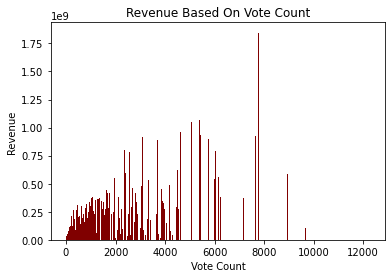

In [15]:
#Revenue based on vote count
plt.bar(df['vote_count'], df['revenue'], color ='maroon', width = 20)
plt.xlabel("Vote Count")
plt.ylabel("Revenue")
plt.title("Revenue Based On Vote Count")
plt.show()

In [16]:
#Original Language preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['original_language'] = le.fit_transform(df.original_language)
df.head(5)

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,rating
0,60000000,6,17.924927,187436818.0,170.0,7.7,1886.0,3.5
1,60000000,6,17.924927,187436818.0,170.0,7.7,1886.0,4.0
2,60000000,6,17.924927,187436818.0,170.0,7.7,1886.0,2.0
3,60000000,6,17.924927,187436818.0,170.0,7.7,1886.0,5.0
4,60000000,6,17.924927,187436818.0,170.0,7.7,1886.0,3.0


In [17]:
#Replace missing values with mean
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['original_language'].fillna(df['original_language'].mean(), inplace=True)
df['revenue'].fillna(df['rating'].mean(), inplace=True)
df['vote_average'].fillna(df['rating'].mean(), inplace=True)
df['vote_count'].fillna(df['rating'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['budget'] = df['budget'].astype('int64') 
df['original_language'] = df['original_language'].astype('int64') 
df['revenue'] = df['revenue'].astype('int64') 
df['vote_average'] = df['vote_average'].astype('int64') 
df['vote_count'] = df['vote_count'].astype('int64') 
df['rating'] = df['rating'].astype('int64') 

In [18]:
#Selection of Numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','object','string']
cols_numeric = df.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric) 

Selected numerical columns:
 ['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'rating']


In [19]:
#MinMax normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_numeric]=scaler.fit_transform(df[cols_numeric])
display(HTML(df.head(10).to_html()))

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,rating
0,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.6
1,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.8
2,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.4
3,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,1.0
4,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.6
5,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.6
6,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.8
7,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,1.0
8,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.8
9,0.157895,0.162162,0.127172,0.10159,0.53125,0.7,0.153721,0.6


Pearson Correlation Matrix for Rating:
rating               1.000000
budget               0.030374
popularity           0.020743
revenue              0.007735
vote_average         0.005319
vote_count           0.004591
runtime             -0.005603
original_language   -0.013303
Name: rating, dtype: float64 



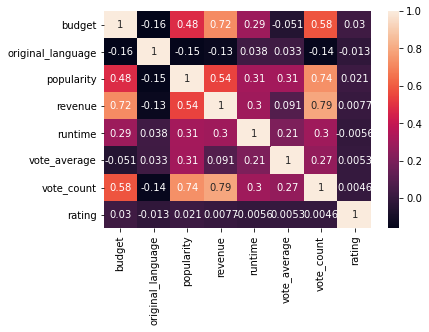

In [20]:
#Pearson correlation Matrix for Rating
df = pd.DataFrame(df,columns=cols_numeric)
corrMatrix = df.corr()
print("Pearson Correlation Matrix for Rating:")
print(corrMatrix['rating'].sort_values(ascending=False),'\n')
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [21]:
#Feature selection using Wrapper technique
import statsmodels.api as sm
cols = list(df.columns)
print('\n x variables: ',cols)
cols.remove('runtime')
cols.remove('original_language')
y=list(df['rating']) 
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('\nSelected features by Wrapper model:\n',selected_features_BE)


 x variables:  ['budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'rating']

Selected features by Wrapper model:
 ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count', 'rating']


Explained variance:  [0.4543479  0.24185978 0.13408217 0.11060993 0.03414508]

PCAs:
 [[-2.23586436e-02  1.29479906e-02 -7.69841613e-03 -1.12007955e-02
  -4.36453831e-03 -9.91427534e-03 -9.99515070e-01]
 [ 5.13556913e-01 -2.60712734e-01  2.13470837e-01  5.38845910e-01
   1.46747643e-01  5.56780237e-01 -2.87115136e-02]
 [-6.34263486e-03  8.77408866e-01  6.63154355e-02  1.05778662e-01
   4.28238781e-01  1.76351316e-01  6.19270849e-03]
 [ 3.28645250e-01  4.01027255e-01 -6.68335811e-02  1.74262979e-01
  -8.33571094e-01 -3.86545688e-02  4.28656736e-04]
 [-7.43766199e-01 -1.75387632e-03  1.34322606e-01  1.56302615e-01
  -2.98210489e-01  5.61528970e-01  9.56114404e-03]]


,PC1,PC2,PC3,rating
0,0.084869,0.181332,0.026960,0.6
1,-0.115034,0.175590,0.028199,0.8
2,0.284772,0.187074,0.025722,0.4
3,-0.314937,0.169848,0.029437,1.0
4,0.084869,0.181332,0.026960,0.6
5,0.084869,0.181332,0.026960,0.6
6,-0.115034,0.175590,0.028199,0.8
7,-0.314937,0.169848,0.029437,1.0
8,-0.115034,0.175590,0.028199,0.8
9,0.084869,0.181332,0.026960,0.6


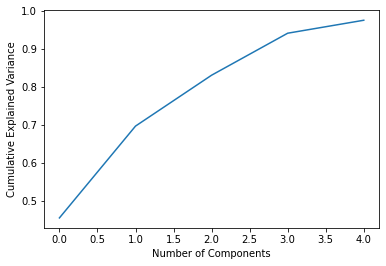

In [22]:
#Feature Reduction using PCA
from sklearn.decomposition import PCA
x = df.drop('runtime', 1)
pca = PCA(n_components=5)
fit = pca.fit(x)

# summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
print('Explained variance: ', fit.explained_variance_ratio_)
print('\nPCAs:\n', fit.components_)
# We choose the top-3 PCAs
PCAs = pca.fit_transform(x)
PCAs_selected = PCAs[:,:3]
df_PCAs = pd.DataFrame(data=PCAs_selected, columns=['PC1','PC2','PC3'])
df_PCAs['rating']=y
display(HTML(df_PCAs.head(10).to_html()))
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<Figure size 864x864 with 0 Axes>

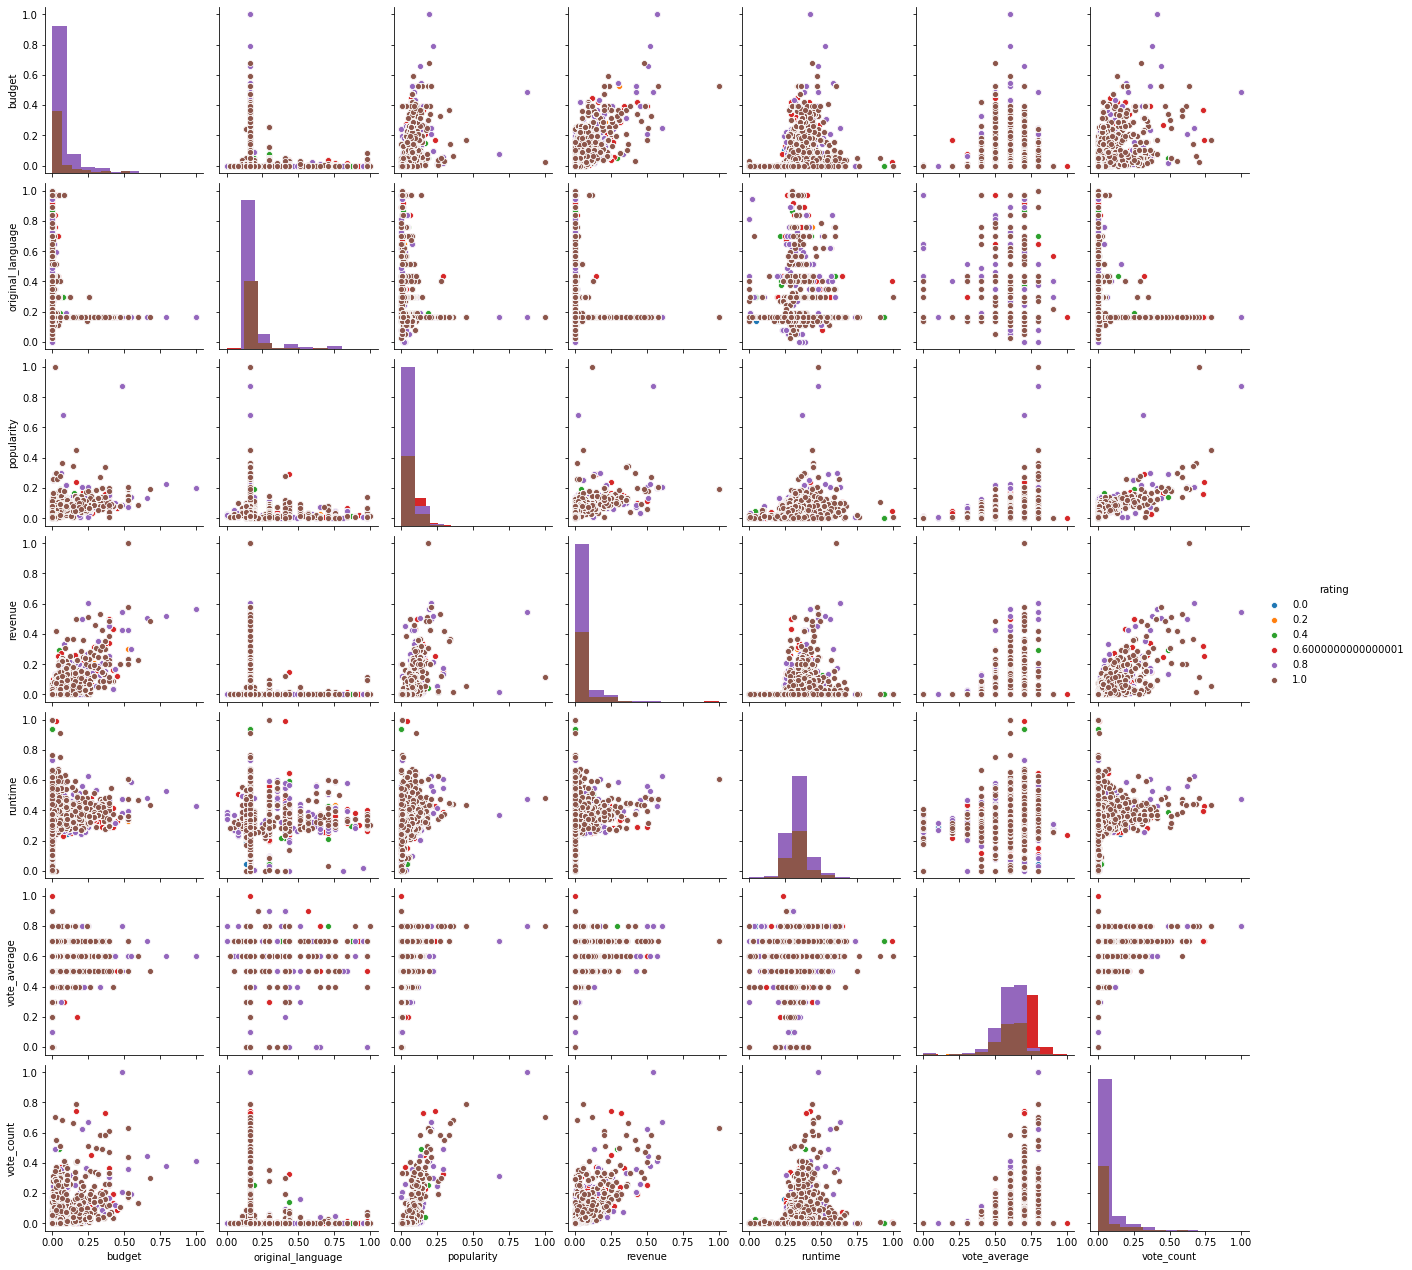

In [23]:
#Pair plot of features with Rating
fig = plt.figure(figsize =(12, 12))
sn.pairplot(df, hue ='rating', diag_kind="hist")
plt.show()

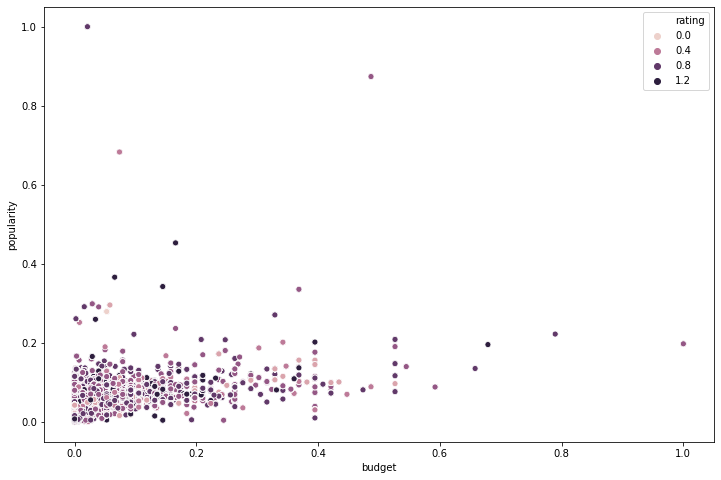

In [24]:
#Scatter plot of budget and popularity with rating
fig = plt.figure(figsize =(12,8))
sn.scatterplot(x="budget", y="popularity",hue="rating",data=df)

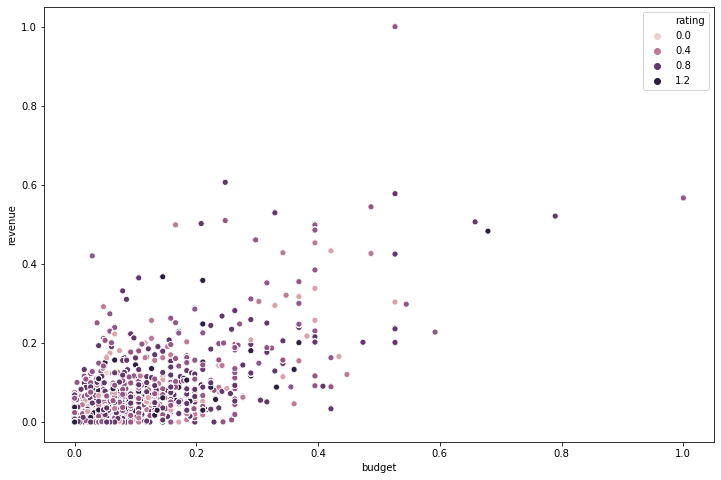

In [25]:
#Scatter plot of budget and revenue with rating
fig = plt.figure(figsize =(12,8))
sn.scatterplot(x="budget",y="revenue", hue="rating",data=df)

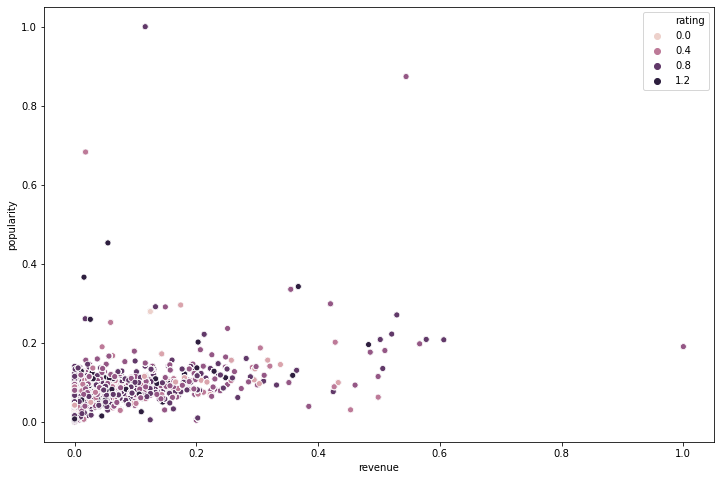

In [26]:
#Scatter plot of revenue and popularity with rating
fig = plt.figure(figsize =(12,8))
sn.scatterplot(x="revenue",y="popularity",hue="rating",data=df)

In [27]:
#Unnecessary features drop
df.drop(['original_language','runtime'], axis=1, inplace=True)

In [28]:
#Data Split: 80% Train, 20% Test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
y=df['rating']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
print(df.dtypes)
df=pd.get_dummies(df.drop('rating',axis=1))
df['rating']=y_encoded
display(HTML(df.head(5).to_html()))
x_train, x_test, y_train, y_test = train_test_split(df, y_encoded, test_size=0.2)

budget          float64
popularity      float64
revenue         float64
vote_average    float64
vote_count      float64
rating          float64
dtype: object


,budget,popularity,revenue,vote_average,vote_count,rating
0,0.157895,0.127172,0.10159,0.7,0.153721,3
1,0.157895,0.127172,0.10159,0.7,0.153721,4
2,0.157895,0.127172,0.10159,0.7,0.153721,2
3,0.157895,0.127172,0.10159,0.7,0.153721,5
4,0.157895,0.127172,0.10159,0.7,0.153721,3


In [29]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
# by N-fold evaluation 
y=df['rating']
x=df.drop('rating',axis=1)
clf = GaussianNB()
acc_nb=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print("NB N-fold Cross Validation f1_micro Score:",acc_nb)

NB N-fold Cross Validation f1_micro Score: 0.34504592777726084


In [30]:
#RandomForest Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini')
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc_rf=accuracy_score(y_pred, y_test)
# by N-fold cross validation
acc_rfn=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print("RF N-fold Cross Validation f1_micro Score:",acc_rfn)

RF N-fold Cross Validation f1_micro Score: 0.2428330198255463


In [31]:
#DecisionTree Model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini') 
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc_dt=accuracy_score(y_pred, y_test)
# by N-fold cross validation
acc_dtn=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print("Decision Tree N-fold Cross Validation f1_micro Score:",acc_dtn)

Decision Tree N-fold Cross Validation f1_micro Score: 0.1969158510388438


In [32]:
#Neural Network Model
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc_nn=accuracy_score(y_pred, y_test)
x=df.drop('rating',axis=1)
y=df['rating']
# by N-fold cross validation
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=1)
acc_nnn=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print("NN N-fold Cross Validation f1_micro Score:",acc_nnn)

NN N-fold Cross Validation f1_micro Score: 0.3567139032340681


In [33]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
clf=LogisticRegression(class_weight='balanced')
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc_lr=accuracy_score(y_pred, y_test)
x=df.drop('rating',axis=1)
y=df['rating']
# by N-fold cross validation
clf=LogisticRegression()
acc_lrn=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print("LR N-fold Cross Validation f1_micro Score:",acc_lrn)

LR N-fold Cross Validation f1_micro Score: 0.36191484662999157


In [34]:
#KNN Model
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
for k in range(1, 24, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test) 
clf=neighbors.KNeighborsClassifier(1, weights='uniform')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
# By N-fold cross evaluations 
from sklearn.model_selection import cross_val_score
for k in range(1, 20, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    acc_knn=cross_val_score(clf, x, y, cv=5, scoring='f1_micro').mean()
print('KNN N-fold Cross Validation f1_micro Score:',acc_knn)

KNN N-fold Cross Validation f1_micro Score: 0.2724365708955684


In [35]:
#Comparison of f1_micro score
models = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Decision Tree', 'Neural Network', 'Logistic Regression', 'KNeighbors'],
    'N-fold f1_micro Score': [acc_nb, acc_rfn, acc_dtn, acc_nnn, acc_lrn, acc_knn]})
models.sort_values(by='N-fold f1_micro Score', ascending=False).reset_index(drop=True)

,Model,N-fold f1_micro Score
0,Logistic Regression,0.361915
1,Neural Network,0.356714
2,Naive Bayes,0.345046
3,KNeighbors,0.272437
4,Random Forest,0.242833
5,Decision Tree,0.196916


In [36]:
#Conclusion
print("Based on observation,Logistic Regression, Neural Network and Naive Bayes models performed better for the movie rating prediction dataset.")
print("Therfore, Logistic Regression, Neural Network and Naive Bayes models are the best fit for movie rating prediction of the given dataset")

Based on observation,Logistic Regression, Neural Network and Naive Bayes models performed better for the movie rating prediction dataset.
Therfore, Logistic Regression, Neural Network and Naive Bayes models are the best fit for movie rating prediction of the given dataset
